In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from robo_limb_ml.models.fk_lstm import FK_LSTM
from robo_limb_ml.models.fk_mlp import FK_MLP
from robo_limb_ml.models.fk_rnn import FK_RNN
from robo_limb_ml.models.fk_seq2seq import FK_SEQ2SEQ


In [16]:
input_size = 6
hidden_size = 512
num_layers = 3
batch_size = 512
output_size = 4
seq_len = 50
stateful = False

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model_path = "/home/ubuntu/Research-HW/SML/RobLimbFK/robo_limb_ml/model_weights/new_weights/LSTM_b512_e200_s-1_LSTM_len10_1722940896"
model_path = "../../model_weights/new_weights/SEQ2SEQ_ATTENTION_b512_e200_s-1_Seq2Seq_len50_LSTM_1722928107"
# model = FK_LSTM(input_size=input_size,
#                 hidden_size=hidden_size,
#                 num_layers=num_layers,
#                 batch_size=batch_size,
#                 output_size=output_size,
#                 device=device,
#                 batch_first=True).to(device=device)
# model.load_state_dict(torch.load(model_path, map_location=device))
# model.h0 = torch.zeros(num_layers, 1, hidden_size).to(device=device)
# model.c0 = torch.zeros(num_layers, 1, hidden_size).to(device=device)
model = FK_SEQ2SEQ(input_size=input_size,
                   embedding_size=hidden_size,
                   num_layers=num_layers,
                   batch_size=batch_size,
                   output_size=output_size,
                   device=device,
                   batch_first=True,
                   encoder_type='LSTM',
                   decoder_type='LSTM',
                   attention=True,
                   pred_len=1,
                   teacher_forcing_ratio=0.0).to(device=device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

device of SEQ2SEQ_Encoder cuda
device of SEQ2SEQ_decoder cuda
device of SEQ2SEQ cuda


/tmp/ipykernel_24235/3874726888.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


FK_SEQ2SEQ(
  (encoder): SEQ2SEQ_Encoder(
    (encoder): LSTM(6, 512, num_layers=3, batch_first=True)
  )
  (decoder): SEQ2SEQ_Decoder(
    (decoder): LSTM(6, 512, num_layers=3, batch_first=True)
    (fc): Linear(in_features=512, out_features=4, bias=True)
    (attention_layer): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
    )
    (fc1): Linear(in_features=6, out_features=512, bias=True)
    (fc2): Linear(in_features=512, out_features=6, bias=True)
  )
  (activation): Tanh()
)

In [17]:
test_df = pd.read_csv("../../ml_data/test_data.csv").dropna()
test_df


,time_begin,time_begin_traj,theta_x,theta_y,vel_x,vel_y,X_throttle,Y_throttle
0,0.348,0.348,-1.50,3.70,0.0,0.000000,0.0,0.0
1,0.409,0.409,-1.50,3.07,0.0,-10.327869,0.0,0.0
2,0.471,0.471,-1.50,3.07,0.0,0.000000,0.0,0.0
3,0.532,0.532,-1.50,3.07,0.0,0.000000,0.0,0.0
4,0.594,0.594,-1.50,3.07,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
31261,1172.517,121.126,-22.03,-37.59,0.0,0.000000,-2.0,10.0
31262,1172.589,121.198,-22.03,-37.59,0.0,0.000000,-2.0,10.0
31263,1172.661,121.270,-22.03,-37.06,0.0,7.361111,-2.0,10.0
31264,1172.733,121.342,-22.03,-37.06,0.0,0.000000,-2.0,10.0


In [18]:
# test_df = test_df[['time_begin', 'time_begin_traj', 'theta_x', 'theta_y',
#        'X_throttle', 'Y_throttle' , 'vel_x', 'vel_y']]
# test_df = test_df.reindex(columns=['time_begin', 'time_begin_traj', 'theta_x', 'theta_y',
#        'X_throttle', 'Y_throttle' , 'vel_x', 'vel_y'], copy=False)
col_1 = test_df.pop('vel_x')
test_df.insert(7, col_1.name, col_1)
col_2 = test_df.pop('vel_y')
test_df.insert(7, col_2.name, col_2)
test_df

,time_begin,time_begin_traj,theta_x,theta_y,X_throttle,Y_throttle,vel_x,vel_y
0,0.348,0.348,-1.50,3.70,0.0,0.0,0.0,0.000000
1,0.409,0.409,-1.50,3.07,0.0,0.0,0.0,-10.327869
2,0.471,0.471,-1.50,3.07,0.0,0.0,0.0,0.000000
3,0.532,0.532,-1.50,3.07,0.0,0.0,0.0,0.000000
4,0.594,0.594,-1.50,3.07,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
31261,1172.517,121.126,-22.03,-37.59,-2.0,10.0,0.0,0.000000
31262,1172.589,121.198,-22.03,-37.59,-2.0,10.0,0.0,0.000000
31263,1172.661,121.270,-22.03,-37.06,-2.0,10.0,0.0,7.361111
31264,1172.733,121.342,-22.03,-37.06,-2.0,10.0,0.0,0.000000


In [19]:
from tqdm import tqdm
test_tensor = torch.tensor(test_df.values.copy(), dtype=torch.float32).to(device=device)
# obs_tensor = torch.tensor(test_df.drop(columns=["vel_x", "vel_y"]).values, dtype=torch.float32).to(device=device)
outputs = torch.zeros(test_df.shape).to(device=device)
outputs[:seq_len] = test_tensor[:seq_len].clone()
hn = torch.zeros(3, 1, 512).to(device=device)
cn = torch.zeros(3, 1, 512).to(device=device)
hidden = (hn, cn)
with torch.no_grad():
    for i in tqdm(range(seq_len, test_df.shape[0])):
        data = outputs[i - seq_len:i, :-2]
        time_begin, time_begin_traj, theta_x, theta_y, X_throttle, Y_throttle, vel_x, vel_y  = test_tensor[i - 1]
        if stateful:
            # delta_states, hn, cn = model(data.unsqueeze(0), hn, cn) LSTM
            delta_states, hidden = model(data.unsqueeze(0), None, hidden, mode='test')
        else:
            delta_states, _ = model(data.unsqueeze(0), None, hidden, mode='test')
        delta_states = delta_states.squeeze()
        time_begin_1, time_begin_traj_1, _, _, X_throttle_1, Y_throttle_1, _, _ = test_tensor[i]
        pred_theta_x, pred_theta_y, pred_vel_x, pred_vel_y = delta_states[0] + theta_x, delta_states[1] + theta_y, delta_states[2] + vel_x, delta_states[3] + vel_y
        outputs[i] = torch.tensor([time_begin_1, time_begin_traj_1, pred_theta_x, pred_theta_y, X_throttle_1, Y_throttle_1, pred_vel_x, pred_vel_y]).to(device=device)

100%|██████████| 31216/31216 [01:11<00:00, 437.70it/s]


In [23]:
outputs_df = pd.DataFrame(outputs.cpu().detach().numpy(), columns=test_df.columns)
output_states = torch.tensor(outputs_df[['theta_x', 'theta_y', 'vel_x', 'vel_y']].values, dtype=torch.float32).to(device=device)
test_states = torch.tensor(test_df[['theta_x', 'theta_y', 'vel_x', 'vel_y']].values, dtype=torch.float32).to(device=device)
from torcheval.metrics import R2Score
metric = R2Score()
metric.update(test_states, output_states)
r2_score = metric.compute()
print("R^2", r2_score.item())

rmse = torch.sqrt(nn.MSELoss()(test_states, output_states))
print("RMSE", rmse.item())

R^2 0.868349015712738
RMSE 8.600626945495605


In [21]:
outputs_df = pd.DataFrame(outputs.cpu().detach().numpy(), columns=test_df.columns)

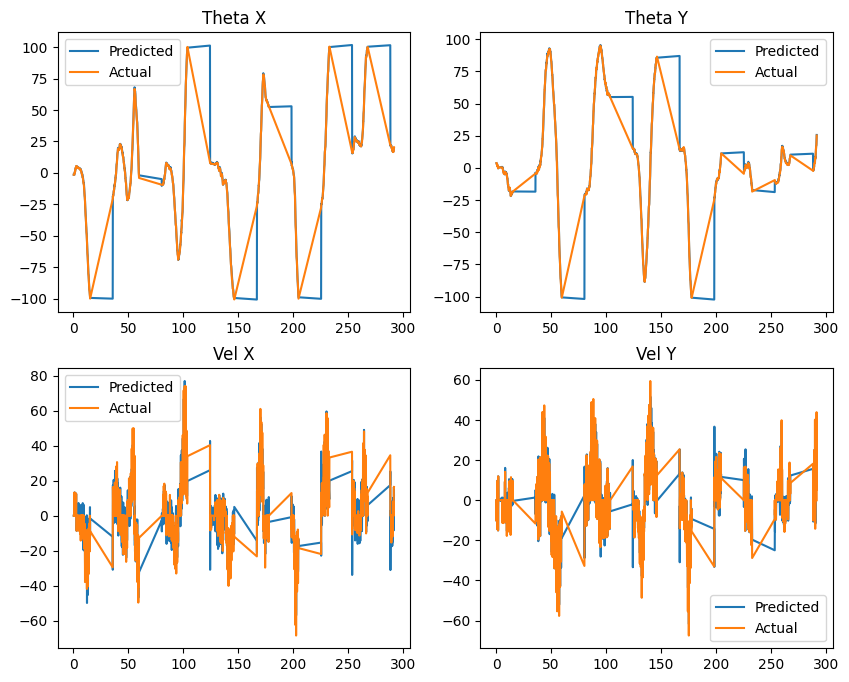

In [22]:
display_window = 1500
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].plot(outputs_df["time_begin"][:display_window], outputs_df["theta_x"][:display_window], label="Predicted")
axs[0, 0].plot(test_df["time_begin"][:display_window], test_df["theta_x"][:display_window], label="Actual")
axs[0, 0].set_title("Theta X")
axs[0, 0].legend()
axs[0, 1].plot(outputs_df["time_begin"][:display_window], outputs_df["theta_y"][:display_window], label="Predicted")
axs[0, 1].plot(test_df["time_begin"][:display_window], test_df["theta_y"][:display_window], label="Actual")
axs[0, 1].set_title("Theta Y")
axs[0, 1].legend()
axs[1, 0].plot(outputs_df["time_begin"][:display_window], outputs_df["vel_x"][:display_window], label="Predicted")
axs[1, 0].plot(test_df["time_begin"][:display_window], test_df["vel_x"][:display_window], label="Actual")
axs[1, 0].set_title("Vel X")
axs[1, 0].legend()
axs[1, 1].plot(outputs_df["time_begin"][:display_window], outputs_df["vel_y"][:display_window], label="Predicted")
axs[1, 1].plot(test_df["time_begin"][:display_window], test_df["vel_y"][:display_window], label="Actual")
axs[1, 1].legend()
axs[1, 1].set_title("Vel Y")
fig.show()